# **Prediksi kekeringan dengan Neural Network Biasa**

Kelompok 9 Machine Learning:

- Heri Khariono (18081010002)

- Devan Cakra Mudra Wijaya (18081010013)

- Rifky Akhmad Fernanda (18081010126)

- Ika Nur Habibah (18081010033)

- Trisa Pratiwi (18081010036)

**DATA SOIL**

In [ ]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from keras.layers import Dense
import requests
import numpy as np
from io import StringIO

soil_url='https://drive.google.com/file/d/1GpPIvMb4Pc1Js3Y3cbyLhNl21mtJAwMn/view?usp=sharing'
file_id = soil_url.split('/')[-2]
dwn_url ='https://drive.google.com/uc?export=download&id=' + file_id
req_url = requests.get(dwn_url).text
soil = pd.read_csv(StringIO(req_url))
soil_df=soil.drop(soil.columns[4:25], axis=1)
soil_df

,fips,lat,lon,elevation,SQ1,SQ2,SQ3,SQ4,SQ5,SQ6,SQ7
0,1001,32.536382,-86.644490,63,1,1,1,1,1,1,2
1,1005,31.870670,-85.405456,146,3,2,1,1,1,1,1
2,1003,30.659218,-87.746067,52,3,2,1,2,1,1,1
3,1007,33.015893,-87.127148,93,3,2,1,1,1,1,1
4,1009,33.977448,-86.567246,198,3,2,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
3104,56037,41.660339,-108.875676,2085,1,1,3,1,1,1,3
3105,56039,44.049321,-110.588102,2564,1,1,1,1,1,1,1
3106,56043,43.878831,-107.669052,1417,1,1,1,1,1,1,1
3107,56041,41.284726,-110.558947,2327,1,1,2,1,1,1,2


**Pembagian data fitur train, test**

In [ ]:
dataset = soil_df.values
dataset

array([[ 1.00100000e+03,  3.25363820e+01, -8.66444900e+01, ...,
         1.00000000e+00,  1.00000000e+00,  2.00000000e+00],
       [ 1.00500000e+03,  3.18706700e+01, -8.54054560e+01, ...,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00],
       [ 1.00300000e+03,  3.06592180e+01, -8.77460670e+01, ...,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00],
       ...,
       [ 5.60430000e+04,  4.38788310e+01, -1.07669052e+02, ...,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00],
       [ 5.60410000e+04,  4.12847260e+01, -1.10558947e+02, ...,
         1.00000000e+00,  1.00000000e+00,  2.00000000e+00],
       [ 5.60450000e+04,  4.38462130e+01, -1.04570020e+02, ...,
         1.00000000e+00,  1.00000000e+00,  2.00000000e+00]])

In [ ]:
# parameter 
param = soil_df.columns[1:4]
param

Index(['lat', 'lon', 'elevation'], dtype='object')

In [ ]:
#### UBAH 21:27 WIB RIfky
X = dataset[:,0:10]
X

array([[ 1.00100000e+03,  3.25363820e+01, -8.66444900e+01, ...,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00],
       [ 1.00500000e+03,  3.18706700e+01, -8.54054560e+01, ...,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00],
       [ 1.00300000e+03,  3.06592180e+01, -8.77460670e+01, ...,
         2.00000000e+00,  1.00000000e+00,  1.00000000e+00],
       ...,
       [ 5.60430000e+04,  4.38788310e+01, -1.07669052e+02, ...,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00],
       [ 5.60410000e+04,  4.12847260e+01, -1.10558947e+02, ...,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00],
       [ 5.60450000e+04,  4.38462130e+01, -1.04570020e+02, ...,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00]])

In [ ]:
# Prediksi data SQ7
Y = dataset[:,10]
Y

array([2., 1., 1., ..., 1., 2., 2.])

**Preprocessing**

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
import numpy as np

min_max_scaler = preprocessing.MinMaxScaler(feature_range = ( 0 , 1 ))
X_Soil_scale = min_max_scaler.fit_transform(X)

X_Soil_scale

array([[0.00000000e+00, 2.98401832e-01, 6.63702375e-01, ...,
        1.42857143e-01, 1.42857143e-01, 1.42857143e-01],
       [7.26691374e-05, 2.69758722e-01, 6.85592641e-01, ...,
        1.42857143e-01, 1.42857143e-01, 1.42857143e-01],
       [3.63345687e-05, 2.17634450e-01, 6.44240590e-01, ...,
        2.85714286e-01, 1.42857143e-01, 1.42857143e-01],
       ...,
       [9.99963665e-01, 7.86425209e-01, 2.92257155e-01, ...,
        1.42857143e-01, 1.42857143e-01, 1.42857143e-01],
       [9.99927331e-01, 6.74810523e-01, 2.41200792e-01, ...,
        1.42857143e-01, 1.42857143e-01, 1.42857143e-01],
       [1.00000000e+00, 7.85021778e-01, 3.47008385e-01, ...,
        1.42857143e-01, 1.42857143e-01, 1.42857143e-01]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_Soil_scale, Y, test_size=0.3, random_state = 0)


In [ ]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [ ]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(2176, 10) (466, 10) (467, 10) (2176,) (466,) (467,)


**Neural Network**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(10,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10,activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
)

In [ ]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
68/68 [==============================] - 1s 5ms/step - loss: 1.4688 - accuracy: 0.7541 - val_loss: 0.8663 - val_accuracy: 0.8240
Epoch 2/100
68/68 [==============================] - 0s 2ms/step - loss: 0.6896 - accuracy: 0.8456 - val_loss: 0.7369 - val_accuracy: 0.8240
Epoch 3/100
68/68 [==============================] - 0s 2ms/step - loss: 0.5951 - accuracy: 0.8465 - val_loss: 0.6467 - val_accuracy: 0.8240
Epoch 4/100
68/68 [==============================] - 0s 2ms/step - loss: 0.5289 - accuracy: 0.8580 - val_loss: 0.5815 - val_accuracy: 0.8541
Epoch 5/100
68/68 [==============================] - 0s 2ms/step - loss: 0.4889 - accuracy: 0.8640 - val_loss: 0.5438 - val_accuracy: 0.8541
Epoch 6/100
68/68 [==============================] - 0s 3ms/step - loss: 0.4598 - accuracy: 0.8672 - val_loss: 0.5112 - val_accuracy: 0.8541
Epoch 7/100
68/68 [==============================] - 0s 2ms/step - loss: 0.4298 - accuracy: 0.8722 - val_loss: 0.4780 - val_accuracy: 0.8584
Epoch 8/100
6

In [ ]:
# model.evaluate(X_test, Y_test)
_, accuracy = model.evaluate(X_train, Y_train)
print('Accuracy: %.2f' % (accuracy*100))

68/68 [==============================] - 0s 2ms/step - loss: 0.0764 - accuracy: 0.9775
Accuracy: 97.75


**Prediksi dengan X_test**

In [ ]:
predictions = model.predict(X_train)
classes_x = np.argmax(predictions,axis=1)

In [ ]:
for i in range(100):
	 print('%s => %d (expected %d)' % (X_test[i].tolist(), classes_x[i], Y_train[i]))

[0.0009810333551340741, 0.36342555442587643, 0.6744806058536432, 0.04969118472768108, 0.42857142857142855, 0.2857142857142857, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285] => 2 (expected 2)
[0.6365816437758883, 0.776918466491779, 0.8782181628641634, 0.21139809096013476, 0.42857142857142855, 0.2857142857142857, 0.2857142857142857, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285] => 2 (expected 1)
[0.9086185596976963, 0.5407010960084091, 0.796167676108851, 0.1428972487366648, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285] => 1 (expected 1)
[0.22334859385219097, 0.39303576645507765, 0.6873606157006358, 0.07523862998315553, 0.42857142857142855, 0.2857142857142857, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285] => 7 (expected 7)
[0.07448586585277232, 0.4435587723914134, 0.5476183522883884, 0.1729365524985963, 0.2857142857142

**Visualizing Loss and Accuracy**

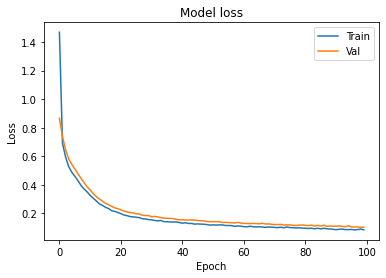

In [ ]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

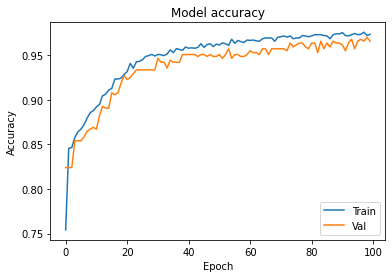

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()